# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [55]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import re
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [56]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [57]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [58]:
# Your code here:

def remove_non_numeric(x):
    if x[-1] == 'M':
        y = float(re.sub('[^0-9\.]', '', x))
        z = y*10**6
        return(z)
    elif x[-1] == 'K':
        y = float(re.sub('[^0-9\.]', '', x))
        z = y*10**3
        return(z)
        
fifa['ValueNumeric'] = fifa['Value'].apply(remove_non_numeric)

fifa.head(5)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [59]:
formula = 'ValueNumeric ~ C(fifa["Preferred Foot"]) + C(Position)'
modelo = ols(formula=formula, data=fifa).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
"C(fifa[""Preferred Foot""])",2.316461e+14,1.0,7.510257,6.140953e-03
C(Position),1.659610e+16,26.0,20.694853,1.699733e-95
Residual,5.514593e+17,17879.0,NaN,NaN


What is your conclusion from this ANOVA?

In [53]:
# Your conclusions here:
#No hay una relación significativa entre la preferencia de los pies del jugador, la posición y el sueldo.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [60]:
# Your code here:

formula = 'ValueNumeric ~ C(fifa["Nationality"])'
modelo = ols(formula=formula, data=fifa).fit()
anova_table = sm.stats.anova_lm(modelo, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
"C(fifa[""Nationality""])",163.0,3.339290e+16,2.048644e+14,6.805485,3.380619e-135
Residual,17792.0,5.355897e+17,3.010284e+13,NaN,NaN


What is your conclusion from this ANOVA?

In [41]:
##No existe una relación significativa entre la nacionalidad y el sueldo recibido del jugador.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [61]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18207 non-null  object 
 1   Age             18207 non-null  int64  
 2   Nationality     18207 non-null  object 
 3   Overall         18207 non-null  int64  
 4   Potential       18207 non-null  int64  
 5   Club            17966 non-null  object 
 6   Value           18207 non-null  object 
 7   Preferred Foot  18159 non-null  object 
 8   Position        18147 non-null  object 
 9   Weak Foot       18159 non-null  float64
 10  Acceleration    18159 non-null  float64
 11  SprintSpeed     18159 non-null  float64
 12  Stamina         18159 non-null  float64
 13  Strength        18159 non-null  float64
 14  LongShots       18159 non-null  float64
 15  Aggression      18159 non-null  float64
 16  Interceptions   18159 non-null  float64
 17  Positioning     18159 non-null 

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [62]:
# Your code here:

fifa = fifa.dropna()

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress

In [64]:
y = fifa['ValueNumeric']

In [65]:
x = sm.add_constant(fifa[['Stamina','SprintSpeed']])

In [66]:
modelo = sm.OLS(y, x).fit()

In [67]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     452.2
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          2.64e-192
Time:                        11:32:45   Log-Likelihood:            -3.0332e+05
No. Observations:               17907   AIC:                         6.066e+05
Df Residuals:                   17904   BIC:                         6.067e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.072e+06   1.97e+05    -15.576      0.000   -3.46e+06   -2.69e+06
Stamina      6.039e+04   3291.696     18.346      0.000    5.39e+04    6.68e+04
SprintSpeed  2.633e+04   3569.288      7.376      0.000    1.93e+04    3.33e+04
==============================================================================
Omnibus:                    22822.402   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4639541.011
Skew:                           7.039   Prob(JB):                         0.00
Kurtosis:                      80.588   Cond. No.                         444.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [68]:
# Your conclusions here:

##El estadistico F y su probabilidad es muy bajo por lo que hay una gran diferencia entre las medias de los datos. 
#Con la columnaP>|t| se puede inferir que la variable const y Stamina tienen diferencias significativas entre sus
#medias y la de SprintSpeed.

Next, create a second regression model predicting value using potential. Create the model using statsmodels and print the model summary. Remember to add a constant term.

In [69]:
# Your code here:
x = sm.add_constant(fifa[['Potential']])

In [70]:
modelo = sm.OLS(y, x).fit()

In [71]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9073.
Date:                Thu, 30 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:32:59   Log-Likelihood:            -3.0009e+05
No. Observations:               17907   AIC:                         6.002e+05
Df Residuals:                   17905   BIC:                         6.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.552e+07      4e+05    -88.778      0.000   -3.63e+07   -3.47e+07
Potential   5.323e+05   5588.269     95.252      0.000    5.21e+05    5.43e+05
==============================================================================
Omnibus:                    23011.631   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6334620.314
Skew:                           7.010   Prob(JB):                         0.00
Kurtosis:                      94.068   Cond. No.                         835.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [72]:
# Your conclusions here:
#Este modelo estará más lejos de un mejor ajuste que el anterior ya que está más alejado del 1. El estadistico F 
#indica que la diferencia entre las medias es significativa.


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [73]:
# Your code here:

import matplotlib.pyplot as plt

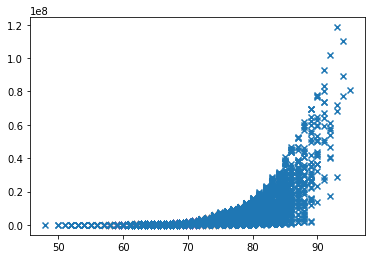

In [74]:
plt.scatter(fifa['Potential'],fifa['ValueNumeric'], marker='x')
plt.show()